In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [4]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [8]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [9]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
dataset['v1']=dataset['v1'].map({'ham':0,'spam':1})

In [12]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

<AxesSubplot: ylabel='count'>

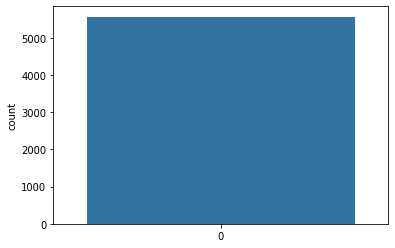

In [14]:
sns.countplot(dataset['v1'])

In [15]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [17]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [18]:
corpus=[]

In [19]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [47]:
for i in range(0,len(dataset)):
    message=re.sub('[^a-zA-Z]',' ',dataset['v2'][i])
    message=message.lower()
    message=message.split()
    ss=SnowballStemmer(language='english')
    message=[ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
    message='  '.join(message)
    corpus.append(message)

In [48]:
corpus[2]

'freeentriwklicompwinfacupfinaltktsstmaytextfareceiventriquestionstdtxtratecappli'

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
X=cv.fit_transform(corpus).toarray()
y=dataset.iloc[:,0].values


In [44]:
X.shape

(22288, 11196)

In [45]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [22288, 5572]

In [ ]:
X_train.shape

NameError: name 'X_train' is not defined